# Student Performance Analysis


For this project I will predict student performance.

## Load packages and dataset

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

## EDA

In [40]:
file = 'StudentsPerformance.csv'
df = pd.read_csv(file)

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [42]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [44]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [45]:
df['total'] = round((df['math score'] + df['reading score'] + df['writing score'])/3).astype('int')

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


<AxesSubplot:xlabel='test preparation course', ylabel='total'>

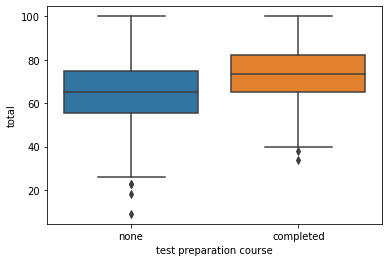

In [47]:
sns.boxplot(x="test preparation course", y="total", data=df)

<AxesSubplot:xlabel='lunch', ylabel='total'>

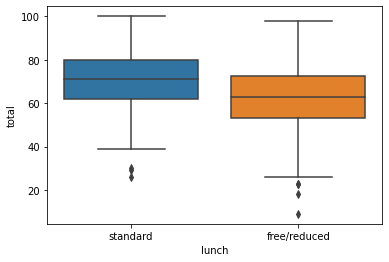

In [48]:
sns.boxplot(x="lunch", y="total", data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='total'>

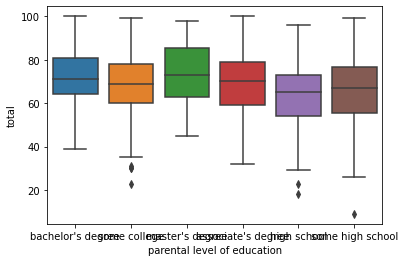

In [49]:
sns.boxplot(x="parental level of education", y="total", data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='total'>

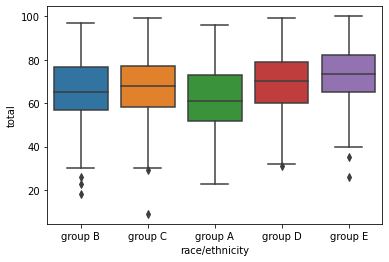

In [50]:
sns.boxplot(x="race/ethnicity", y="total", data=df)

<AxesSubplot:xlabel='gender', ylabel='total'>

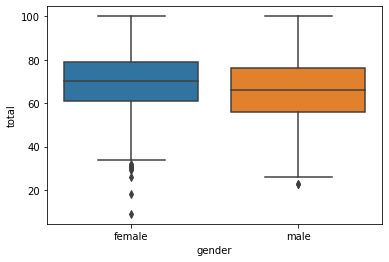

In [51]:
sns.boxplot(x="gender", y="total", data=df)

In [52]:
df = pd.get_dummies(df)

<AxesSubplot:>

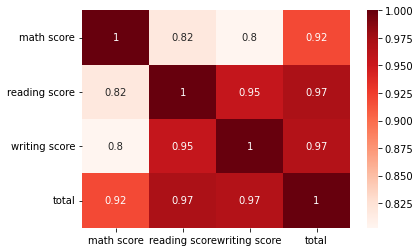

In [53]:
corrdf = df[['math score', 'reading score', 'writing score', 'total']]
corr=corrdf.corr()
sns.heatmap(corr, annot=True, cmap="Reds")

In [54]:
df.columns

Index(['math score', 'reading score', 'writing score', 'total',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [55]:
y = df['total']
dffeatures = ['gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']
X = df[dffeatures]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=100 ,random_state=42)
randomforest.fit(X_train, y_train)
y_pred_random=randomforest.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
# get feature importances and print them out
importances = randomforest.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.3f}')

# sort feature importances by importance score
indices = np.argsort(importances)[::-1]
sorted_features = [X.columns[i] for i in indices]

# print random forest accuracy on the whole dataset
print("random forest accuracy r^2: ", randomforest.score(X,y).round(2))

gender_female: 0.069
gender_male: 0.068
race/ethnicity_group A: 0.056
race/ethnicity_group B: 0.066
race/ethnicity_group C: 0.075
race/ethnicity_group D: 0.067
race/ethnicity_group E: 0.063
parental level of education_associate's degree: 0.067
parental level of education_bachelor's degree: 0.061
parental level of education_high school: 0.061
parental level of education_master's degree: 0.044
parental level of education_some college: 0.058
parental level of education_some high school: 0.060
lunch_free/reduced: 0.049
lunch_standard: 0.045
test preparation course_completed: 0.046
test preparation course_none: 0.045
random forest accuracy r^2:  0.23


In [59]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(random_state=42)
decisiontree.fit(X_train, y_train)
ypred_dt = decisiontree.predict(X_test)

In [60]:
# Print the feature importances
importances = decisiontree.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.3f}')

# Print the accuracy of the decision tree
print("Decision tree accuracy: ", decisiontree.score(X, y).round(2))

gender_female: 0.062
gender_male: 0.045
race/ethnicity_group A: 0.084
race/ethnicity_group B: 0.036
race/ethnicity_group C: 0.036
race/ethnicity_group D: 0.025
race/ethnicity_group E: 0.032
parental level of education_associate's degree: 0.025
parental level of education_bachelor's degree: 0.053
parental level of education_high school: 0.064
parental level of education_master's degree: 0.053
parental level of education_some college: 0.023
parental level of education_some high school: 0.067
lunch_free/reduced: 0.000
lunch_standard: 0.212
test preparation course_completed: 0.094
test preparation course_none: 0.089
Decision tree accuracy:  0.31


In [61]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
linearregpred = linearreg.predict(X_test)
linearreg.score(X_test,y_test)

0.16075385104794304

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,  r2_score

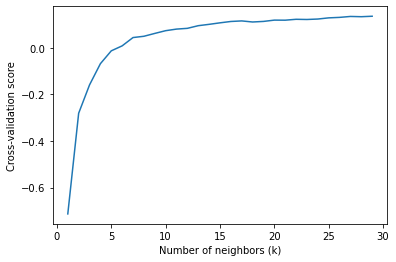

In [63]:
cv_scores = []
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring="r2")
    cv_scores.append(scores.mean())

# Plot the cross-validation scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(1, 30), cv_scores)
plt.xlabel("Number of neighbors (k)")
plt.ylabel("Cross-validation score")
plt.show()

In [64]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)

# Make predictions on the test data and compute the mean squared error
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 score:", r2)
print("Mean squared error:", mse)
print("Accuracy: ",r2)

RMSE: 13.551233799916524
R2 score: 0.08953694214683439
Mean squared error: 183.6359375
Accuracy:  0.08953694214683439


## Predict Pass/Fail

In [65]:
print("total over 60: ",(df['total'] >= 60).sum())
print("total under 60: ",(df['total'] < 60).sum())

total over 60:  720
total under 60:  280


In [66]:
df['pass'] = 0
df.loc[df['total']>= 60, 'pass'] = 1

In [67]:
X = df.drop('pass', axis= 1)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.985


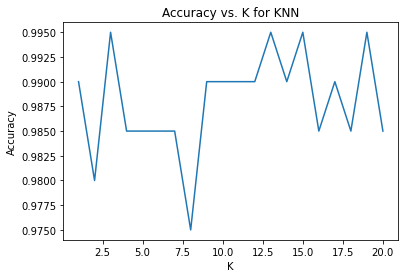

In [69]:
# Create the KNN classifier
n_neighbors = 5
weights = 'uniform'
algorithm = 'auto'
p = 2
knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the accuracy for different values of k
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracies)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for KNN")
plt.show()

## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 1.0


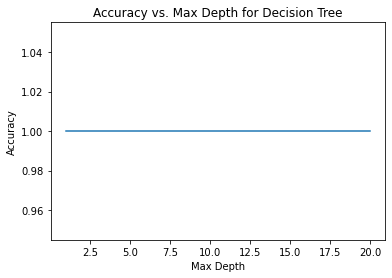

In [71]:
# Create the decision tree classifier
max_depth = 5
criterion = 'gini'
splitter = 'best'
min_samples_split = 2
min_samples_leaf = 1
dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualize the accuracy for different values of max_depth
max_depths = range(1, 21)
accuracies = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, splitter=splitter, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(max_depths, accuracies)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Max Depth for Decision Tree")
plt.show()

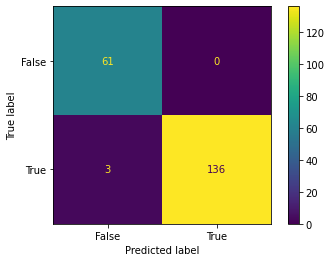

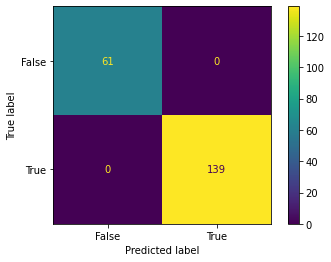

In [72]:
from sklearn import metrics, neighbors
from sklearn.metrics import confusion_matrix

# KNN confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dtc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dt, display_labels = [False, True])

cm_display.plot()
plt.show()
